<a href="https://colab.research.google.com/github/BenUCL/Reef-acoustics-and-AI/blob/main/Code/Trained_CNN_accuracy_calculator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Get trained CNN accuracy**

This script reads in csv files which contain class predictions for each 0.96sec chunk taken from 1min recordings (so 62 per min) in the test set for each repeat performed for each classfication task across the Indonesia, Australian and French Polynesian tasks. CSVs were generated by training CNN's on the full dataset for each task and are stored in the 'Results/Colab_CNN_predictions' folder on the Google Drive.

The accuracy of each repeat across each full minute is calculated. These are output for each repeat, as well as mean and StDev across all repeats. A confusion matrix across all repeats is also generated for each task.

In [1]:
# connect your Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
import pandas as pd
import numpy as np
import collections
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sn
import matplotlib.pyplot as plt
import statistics
import os
from sklearn.metrics import confusion_matrix
import string

num_classes = 2

# **Indonesia habitat classifier accuracy**

In [3]:
# Place all csv prediction files in 'directory'. This codeblock will then find
# the accuracy of each file. The next will get the mean and StDev of this.
directory = '/content/drive/MyDrive/Reef soundscapes with AI/Results/CNN_predictions_indo_habitat/'

# This function reads in results df from the NN and finds the class for each 0.96s chunk
def find_prediction (df, class1, class2, Prediction):
    df[Prediction] = np.where((df[class1]>df[class2]), 1, 2)  # WARNING!!! for >2 classes, may need changing
    df['True class'] = pd.to_numeric(df['True class']+1) #add 1 so classes go 1,2 etc not 0,1 etc, switch to numeric
    return df

ConfusionMatrix = np.zeros((num_classes,num_classes), dtype=float)
all_acc_scores = []
for file in os.listdir(directory): #comment out if doing 1 csv with code above ^
#for file in repeat: #uncomment if doing 1 csv with code above ^
     filename = os.fsdecode(file)
     if filename.endswith(".csv"): 
     #Read csv file, add headers for class
        print(filename + ':')
        batch_32 = pd.read_csv(directory + filename, names=["class1", "class2", "True class"])
        results = find_prediction(batch_32, 'class1','class2','Prediction')

        #Finds the mode prediction for each minute from all 62 0.96 chunks:
        predictions_byminute = results.groupby(results.index // 62).agg(lambda x: x.value_counts().index[0])

        #Calculate accuracy and store this
        df = pd.concat([predictions_byminute['True class'], predictions_byminute['Prediction']], axis = 1)
        accuracy = (predictions_byminute['True class'][0:len(predictions_byminute['True class'])] == predictions_byminute['Prediction'][0:len(predictions_byminute['Prediction'])]).sum() / len(predictions_byminute['True class'])
        print('Accuracy using most common prediction per one-minute: ' + str(accuracy))
        all_acc_scores.append(accuracy)

        new_conf = confusion_matrix(df['True class'], df['Prediction'])
        ConfusionMatrix = np.add(ConfusionMatrix, new_conf)        

# Used to find averages of accuracy score across all minibatches
def Average(lst):
    return sum(lst) / len(lst)

#1min avg accs
mean = Average(all_acc_scores)
stdev = statistics.stdev(all_acc_scores) # comment out if only testing on one csv
print()
print(all_acc_scores)
print()
print('1min accuracy:')
print('Mean: ' + str(round(mean, 5)) + ' & StDev: ' + str(round(stdev, 5)))

print()
print('Confusion Matrix across all 100 repeats')
print(repr(ConfusionMatrix))

Copy of HabitatLvL_CVRepeat100_Epoch27_ValAcc_0.92248.csv:
Accuracy using most common prediction per one-minute: 0.8583333333333333
Copy of HabitatLvL_CVRepeat11_Epoch3_ValAcc_0.81519.csv:
Accuracy using most common prediction per one-minute: 0.875
Copy of HabitatLvL_CVRepeat93_Epoch5_ValAcc_0.86425.csv:
Accuracy using most common prediction per one-minute: 0.9812646370023419
Copy of HabitatLvL_CVRepeat96_Epoch35_ValAcc_0.88774.csv:
Accuracy using most common prediction per one-minute: 0.725
Copy of HabitatLvL_CVRepeat99_Epoch27_ValAcc_0.82466.csv:
Accuracy using most common prediction per one-minute: 1.0
Copy of HabitatLvL_CVRepeat92_Epoch29_ValAcc_0.88474.csv:
Accuracy using most common prediction per one-minute: 0.8722466960352423
Copy of HabitatLvL_CVRepeat97_Epoch22_ValAcc_0.99731.csv:
Accuracy using most common prediction per one-minute: 0.85625
Copy of HabitatLvL_CVRepeat98_Epoch40_ValAcc_0.92571.csv:
Accuracy using most common prediction per one-minute: 0.98
Copy of HabitatLvL_

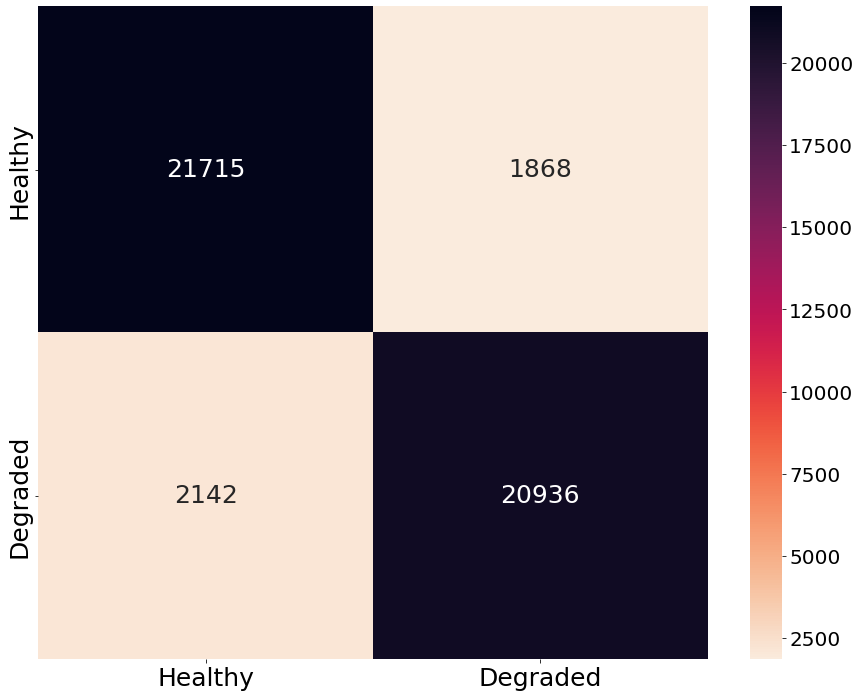

In [5]:
# copy in the confusion matrix from the HPC .o output file
#ConfuseionMatrix = confusion_matrix(test_labels, test_predictions)
array = ConfusionMatrix
df_cm = pd.DataFrame(array, index = ['Healthy', 'Degraded'], 
                  columns = ['Healthy', 'Degraded'])
plt.figure(figsize = (15,12))
cmap = sn.cm.rocket_r
ax = sn.heatmap(df_cm, annot=True, annot_kws={"fontsize":25}, fmt='g', cmap = cmap)
ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = 25)
ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize = 25)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=20)

# **Indonesia site classifier accuracy**

In [9]:
num_classes = 4
labels = ['HBa','HBo','DBo','DSa']

# Place all csv prediction files in 'directory'. This codeblock will then find
# the accuracy of each file. The next will get the mean and StDev of this.
directory = '/content/drive/MyDrive/Reef soundscapes with AI/Results/CNN_predictions_indo_site/'

# This function reads in results df from the NN and finds the class for each 0.96s chunk
def find_prediction (df, class1, class2, class3, class4, Prediction):
    class_prediction_string = batch_32[["class1", "class2", "class3", "class4"]].idxmax(axis=1)
    class_prediction_string_aslist = class_prediction_string.tolist()
    class_prediction_ints = []
    for item in class_prediction_string:
        for subitem in item:
            if(subitem.isdigit()):
                class_prediction_ints.append(int(subitem))

    batch_32['Prediction'] = class_prediction_ints
    
    #df[Prediction] = class_prediction_ints  # WARNING!!! for >2 classes, may need changing
    df['True class'] = pd.to_numeric(df['True class']+1) #add 1 so classes go 1,2 etc not 0,1 etc, switch to numeric
    return df

ConfusionMatrix = np.zeros((num_classes,num_classes), dtype=float)
all_acc_scores = []
for file in os.listdir(directory): #comment out if using just one csv with the code block above ^
#for file in repeat: #uncomment if using just one csv with the code block above ^
     filename = os.fsdecode(file)
     if filename.endswith(".csv"): 
     #Read csv file, add headers for class
        print(filename + ':')
        batch_32 = pd.read_csv(directory + filename, names=["class1", "class2", "class3", "class4", "True class"])
        results = find_prediction(batch_32, "class1", "class2", "class3", "class4", 'Prediction')

        #Finds the mode prediction for each minute from all 62 0.96 chunks:
        predictions_byminute = results.groupby(results.index // 62).agg(lambda x: x.value_counts().index[0])

        #Calculate accuracy and store this
        df = pd.concat([predictions_byminute['True class'], predictions_byminute['Prediction']], axis = 1)
        accuracy = (predictions_byminute['True class'][0:len(predictions_byminute['True class'])] == predictions_byminute['Prediction'][0:len(predictions_byminute['Prediction'])]).sum() / len(predictions_byminute['True class'])
        print('Accuracy using most common prediction per one-minute: ' + str(accuracy))
        all_acc_scores.append(accuracy)

        new_conf = confusion_matrix(df['True class'], df['Prediction'], labels = [1,2,3,4]) # added the labels param for this script as some only had 3 classes
        ConfusionMatrix = np.add(ConfusionMatrix, new_conf)

print(all_acc_scores)

# Used to find averages of accuracy score across all minibatches
def Average(lst):
    return sum(lst) / len(lst)

mean = Average(all_acc_scores)
stdev = statistics.stdev(all_acc_scores)

print('Mean: ' + str(round(mean, 5)) + ' & StDev: ' + str(round(stdev, 5)))

print()
print('Confusion Matrix across all 100 repeats')
print(repr(ConfusionMatrix))

Copy of SiteLvL_CVRepeat82_Epoch36_ValAcc_0.966.csv:
Accuracy using most common prediction per one-minute: 0.8854166666666666
Copy of SiteLvL_CVRepeat83_Epoch14_ValAcc_0.97519.csv:
Accuracy using most common prediction per one-minute: 0.99375
Copy of SiteLvL_CVRepeat84_Epoch50_ValAcc_0.9001.csv:
Accuracy using most common prediction per one-minute: 0.9355555555555556
Copy of SiteLvL_CVRepeat85_Epoch13_ValAcc_0.99227.csv:
Accuracy using most common prediction per one-minute: 0.788546255506608
Copy of SiteLvL_CVRepeat86_Epoch36_ValAcc_0.9695.csv:
Accuracy using most common prediction per one-minute: 0.8984547461368654
Copy of SiteLvL_CVRepeat87_Epoch4_ValAcc_0.96037.csv:
Accuracy using most common prediction per one-minute: 0.847682119205298
Copy of SiteLvL_CVRepeat88_Epoch2_ValAcc_0.73046.csv:
Accuracy using most common prediction per one-minute: 0.90625
Copy of SiteLvL_CVRepeat89_Epoch3_ValAcc_0.91594.csv:
Accuracy using most common prediction per one-minute: 0.8083333333333333
Copy of

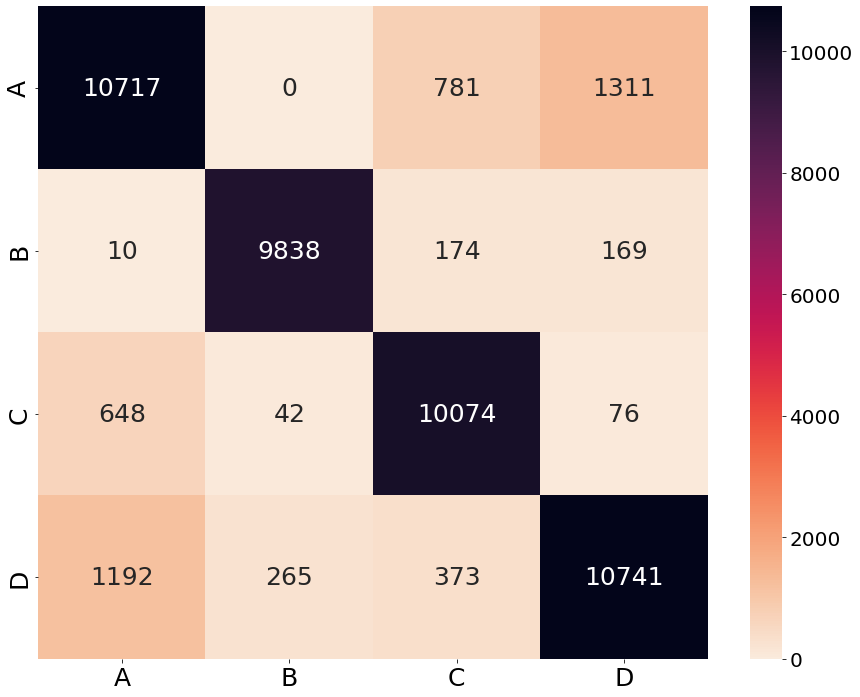

In [10]:
# copy in the confusion matrix from the HPC .o output file
#ConfuseionMatrix = confusion_matrix(test_labels, test_predictions)
array = ConfusionMatrix

df_cm = pd.DataFrame(array, index = ['A','B','C','D'],
                  columns = ['A','B','C','D'])

plt.figure(figsize = (15,12))
cmap = sn.cm.rocket_r
ax = sn.heatmap(df_cm, annot=True, annot_kws={"fontsize":25}, fmt='g', cmap = cmap)
ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = 25)
ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize = 25)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=20)

# **Australia habitat classifier**

In [18]:
# Place all csv prediction files in 'directory'. This codeblock will then find
# the accuracy of each file. The next will get the mean and StDev of this.
directory = '/content/drive/MyDrive/Reef soundscapes with AI/Results/CNN_predictions_aus_habitat/'
num_classes = 2


def change_to_letter(df):
  """ to convert class predictions from numbers to letters so
  Confusion matrix can show letters - as these correspond to site name"""
  df.loc[df['Prediction'] == 1, 'Prediction'] = 'A'
  df.loc[df['Prediction'] == 2, 'Prediction'] = 'B'

  return df

def get_repeat_num(filename):
  """get the repeat number from the filename. Got this off
  stackoverflow, no idead why it works but it does"""
  no_digits = string.printable[10:]
  trans = str.maketrans(no_digits, " "*len(no_digits))
  return filename.translate(trans).split()[0]


# This function reads in results df from the NN and finds the class for each 0.96s chunk
def find_prediction (df, class1, class2,Prediction):
    class_prediction_string = batch_32[['Class1','Class2']].idxmax(axis=1)
    class_prediction_string_aslist = class_prediction_string.tolist()
    class_prediction_ints = []
    for item in class_prediction_string:
      class_ = int(item[5:])
      class_prediction_ints.append(int(class_))

    batch_32['Prediction'] = class_prediction_ints
    
    #df[Prediction] = class_prediction_ints  # WARNING!!! for >2 classes, may need changing
    df['True class'] = pd.to_numeric(df['True class']+1) #add 1 so classes go 1,2 etc not 0,1 etc, switch to numeric
    return df


def similar(x,y):
    si = 0
    for a,b in zip(x, y):
        if a == b:
            si += 1
    return (si/len(x)) * 100


# Used to find averages of accuracy score across all minibatches
def Average(lst):
    return sum(lst) / len(lst)


all_acc_scores = []
whole_day_acc_scores = []


ConfusionMatrix = np.zeros((num_classes,num_classes), dtype=float)
for i in range(1,33):
  repeat_all_acc_scores = []
  repeat_whole_day_acc_scores = []
  repeat = str(i)
  for file in os.listdir(directory):
  #for file in repeat:
      filename = os.fsdecode(file)   
      if filename.endswith(".csv"):
        repeat_num = get_repeat_num(filename)
        if repeat_num==repeat:
          print(filename)
          #Read csv file, add headers for class
          batch_32 = pd.read_csv(directory + filename, names=['Class1','Class2', "True class"])
          
          results = find_prediction(batch_32, 'Class1','Class2', 'Prediction')

          #Finds the mode prediction for each minute from all 62 0.96 chunks:
          predictions_byminute = results.groupby(results.index // 62).agg(lambda x: x.value_counts().index[0])

          #Calculate accuracy and store this
          df = pd.concat([predictions_byminute['True class'], predictions_byminute['Prediction']], axis = 1)
          accuracy = (predictions_byminute['True class'][0:len(predictions_byminute['True class'])] == predictions_byminute['Prediction'][0:len(predictions_byminute['Prediction'])]).sum() / len(predictions_byminute['True class'])
          print('Accuracy using most common prediction per one-minute: ' + str(accuracy))
          all_acc_scores.append(accuracy)
          repeat_all_acc_scores.append(accuracy)
          
          # Get 24hr acc
          #change_to_letter(df) ###
          new_conf = confusion_matrix(df['True class'], df['Prediction'])
          ConfusionMatrix = np.add(ConfusionMatrix, new_conf)

          # see if for this site the 1min files are predicted right >50% of the time
          if  accuracy >= 0.5:
            whole_day_acc = 1
          else:
            whole_day_acc = 0


          print('Accuracy using most common prediction per 24hr: ' + str(whole_day_acc))
          whole_day_acc_scores.append(whole_day_acc)
          repeat_whole_day_acc_scores.append(whole_day_acc)


#1min avg accs
mean = Average(all_acc_scores)
stdev = statistics.stdev(all_acc_scores) # comment out if only testing on one csv
print()
print(all_acc_scores)
print()
print('1min accuracy:')
print('Mean: ' + str(round(mean, 5)) + ' & StDev: ' + str(round(stdev, 5)))

#24hr avg accs
mean = Average(whole_day_acc_scores)
stdev = statistics.stdev(whole_day_acc_scores) # comment out if only testing on one csv
print()
print(whole_day_acc_scores)
print('24hr accuracy:')
print('Mean: ' + str(round(mean, 5)) + ' & StDev: ' + str(round(stdev, 5)))

print()
print('Confusion Matrix across all 100 repeats')
print(repr(ConfusionMatrix))

FishLvL_CVRepeat1_Epoch13_ValAcc_0.7_TestAcc_0.69.csv
Accuracy using most common prediction per one-minute: 0.6767810026385225
Accuracy using most common prediction per 24hr: 1
FishLvL_CVRepeat2_Epoch17_ValAcc_0.77_TestAcc_0.76.csv
Accuracy using most common prediction per one-minute: 0.8157142857142857
Accuracy using most common prediction per 24hr: 1
FishLvL_CVRepeat3_Epoch27_ValAcc_0.64_TestAcc_0.63.csv
Accuracy using most common prediction per one-minute: 0.624
Accuracy using most common prediction per 24hr: 1
FishLvL_CVRepeat4_Epoch24_ValAcc_0.65_TestAcc_0.62.csv
Accuracy using most common prediction per one-minute: 0.6187335092348285
Accuracy using most common prediction per 24hr: 1
FishLvL_CVRepeat5_Epoch15_ValAcc_0.78_TestAcc_0.78.csv
Accuracy using most common prediction per one-minute: 0.8271428571428572
Accuracy using most common prediction per 24hr: 1
FishLvL_CVRepeat6_Epoch12_ValAcc_0.62_TestAcc_0.62.csv
Accuracy using most common prediction per one-minute: 0.6594516594516

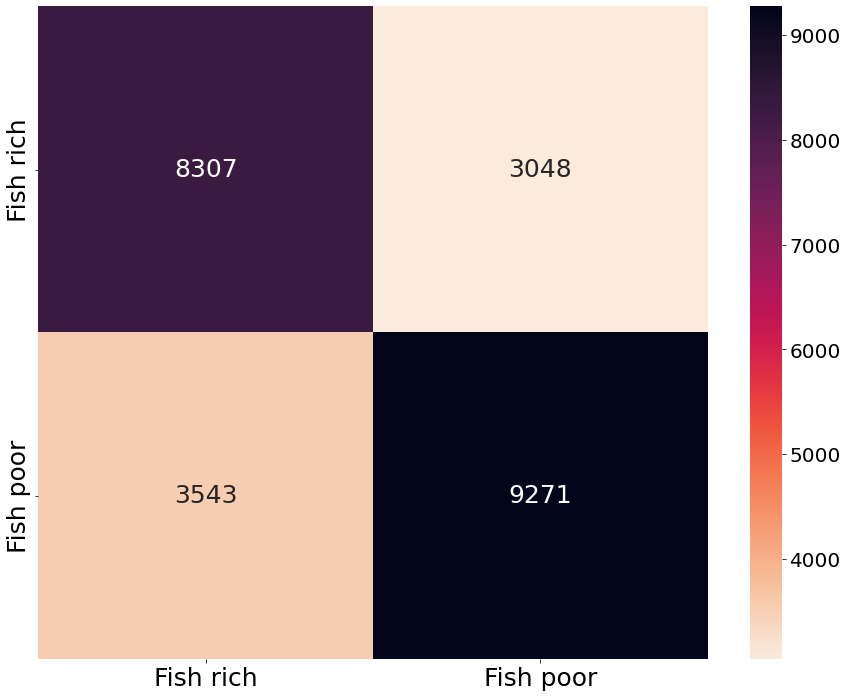

In [19]:
array = ConfusionMatrix
df_cm = pd.DataFrame(array, index = ["Fish rich", "Fish poor"],
                  columns = ["Fish rich", "Fish poor"])
plt.figure(figsize = (15,12))
cmap = sn.cm.rocket_r
ax = sn.heatmap(df_cm, annot=True, annot_kws={"fontsize":25}, fmt='g', cmap = cmap)
ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = 25)
ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize = 25)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=20)

# **Australia site classifier**

In [21]:
# Place all csv prediction files in 'directory'. This codeblock will then find
# the accuracy of each file. The next will get the mean and StDev of this.
directory = '/content/drive/MyDrive/Reef soundscapes with AI/Results/CNN_predictions_aus_site/'
num_classes = 12


def change_to_letter(df):
  """ to convert class predictions from numbers to letters so
  Confusion matrix can show letters - as these correspond to site name
  
  Note, the order of sites names were also changed as sites were renamed
  to make the UMAPs more readable after the neural networks had already been 
  run"""
  df.loc[df['Prediction'] == 1, 'Prediction'] = 'A' 
  df.loc[df['Prediction'] == 2, 'Prediction'] = 'G' 
  df.loc[df['Prediction'] == 3, 'Prediction'] = 'D' 
  df.loc[df['Prediction'] == 4, 'Prediction'] = 'E' 
  df.loc[df['Prediction'] == 5, 'Prediction'] = 'B' 
  df.loc[df['Prediction'] == 6, 'Prediction'] = 'I' 
  df.loc[df['Prediction'] == 7, 'Prediction'] = 'H' 
  df.loc[df['Prediction'] == 8, 'Prediction'] = 'L' 
  df.loc[df['Prediction'] == 9, 'Prediction'] = 'C' 
  df.loc[df['Prediction'] == 10, 'Prediction'] = 'F' 
  df.loc[df['Prediction'] == 11, 'Prediction'] = 'J' 
  df.loc[df['Prediction'] == 12, 'Prediction'] = 'K' 

  df.loc[df['True class'] == 1, 'True class'] = 'A'
  df.loc[df['True class'] == 2, 'True class'] = 'G'
  df.loc[df['True class'] == 3, 'True class'] = 'D'
  df.loc[df['True class'] == 4, 'True class'] = 'E'
  df.loc[df['True class'] == 5, 'True class'] = 'B'
  df.loc[df['True class'] == 6, 'True class'] = 'I'
  df.loc[df['True class'] == 7, 'True class'] = 'H'
  df.loc[df['True class'] == 8, 'True class'] = 'L'
  df.loc[df['True class'] == 9, 'True class'] = 'C'
  df.loc[df['True class'] == 10, 'True class'] = 'F'
  df.loc[df['True class'] == 11, 'True class'] = 'J'
  df.loc[df['True class'] == 12, 'True class'] = 'K'
  return df

def get_repeat_num(filename):
  """get the repeat number from the filename. Got this off
  stackoverflow, no idead why it works but it does"""
  no_digits = string.printable[10:]
  trans = str.maketrans(no_digits, " "*len(no_digits))
  return filename.translate(trans).split()[0]


# This function reads in results df from the NN and finds the class for each 0.96s chunk
def find_prediction (df, class1, class2, class3, class4, class5, class6, class7,
                     class8, class9, class10, class11, class12, Prediction):
    class_prediction_string = batch_32[['Class1','Class2','Class3','Class4','Class5',
                                        'Class6','Class7','Class8','Class9','Class10',
                                        'Class11','Class12']].idxmax(axis=1)
    class_prediction_string_aslist = class_prediction_string.tolist()
    class_prediction_ints = []
    for item in class_prediction_string:
      class_ = int(item[5:])
      class_prediction_ints.append(int(class_))

    batch_32['Prediction'] = class_prediction_ints
    
    #df[Prediction] = class_prediction_ints  # WARNING!!! for >2 classes, may need changing
    df['True class'] = pd.to_numeric(df['True class']+1) #add 1 so classes go 1,2 etc not 0,1 etc, switch to numeric
    return df

# Used to find averages of accuracy score across all minibatches
def Average(lst):
    return sum(lst) / len(lst)

all_acc_scores = []
whole_day_acc_scores = []


ConfusionMatrix = np.zeros((num_classes,num_classes), dtype=float)
for i in range(1,101):#101):
  repeat_all_acc_scores = []
  repeat_whole_day_acc_scores = []
  repeat = str(i)
  for file in os.listdir(directory):
  #for file in repeat:
      filename = os.fsdecode(file)
      repeat_num = get_repeat_num(filename)
      if filename.endswith(".csv") and repeat_num==repeat:
      #Read csv file, add headers for class
        print(filename)
        batch_32 = pd.read_csv(directory + filename, names=['Class1','Class2','Class3','Class4','Class5',
                                        'Class6','Class7','Class8','Class9','Class10',
                                        'Class11','Class12', "True class"])
        
        results = find_prediction(batch_32, 'Class1','Class2','Class3','Class4','Class5',
                                        'Class6','Class7','Class8','Class9','Class10',
                                        'Class11','Class12', 'Prediction')

        #Finds the mode prediction for each minute from all 62 0.96 chunks:
        predictions_byminute = results.groupby(results.index // 62).agg(lambda x: x.value_counts().index[0])

        #Calculate accuracy and store this
        df = pd.concat([predictions_byminute['True class'], predictions_byminute['Prediction']], axis = 1)
        accuracy = (predictions_byminute['True class'][0:len(predictions_byminute['True class'])] == predictions_byminute['Prediction'][0:len(predictions_byminute['Prediction'])]).sum() / len(predictions_byminute['True class'])
        #print('Accuracy using most common prediction per one-minute: ' + str(accuracy))
        all_acc_scores.append(accuracy)
        repeat_all_acc_scores.append(accuracy)
        
        # Get 24hr acc
        change_to_letter(df) ###
        new_conf = confusion_matrix(df['True class'], df['Prediction'])
        ConfusionMatrix = np.add(ConfusionMatrix, new_conf)
        acc = 0 
        for i in range(num_classes):
          max = np.amax(new_conf[i])
          #print(max)
          if max == new_conf[i,i]:
            acc += 1
        whole_day_acc = acc/num_classes
        print('Whole day acc: ' + str(whole_day_acc))
        print('1min acc: ' + str(accuracy))
        #print('Accuracy using most common prediction per 24hr: ' + str(whole_day_acc))
        whole_day_acc_scores.append(whole_day_acc)
        repeat_whole_day_acc_scores.append(whole_day_acc)




#1min avg accs
mean = Average(all_acc_scores)
stdev = statistics.stdev(all_acc_scores) # comment out if only testing on one csv
print()
print(all_acc_scores)
print()
print('1min accuracy:')
print('Mean: ' + str(round(mean, 5)) + ' & StDev: ' + str(round(stdev, 5)))

#24hr avg accs
mean = Average(whole_day_acc_scores)
stdev = statistics.stdev(whole_day_acc_scores) # comment out if only testing on one csv
print()
print(whole_day_acc_scores)
print('24hr accuracy:')
print('Mean: ' + str(round(mean, 5)) + ' & StDev: ' + str(round(stdev, 5)))

print()
print('Confusion Matrix across all 100 repeats')
print(repr(ConfusionMatrix))

SiteLvL_CVRepeat1_Epoch5_ValAcc_0.45714.csv
Whole day acc: 0.5833333333333334
1min acc: 0.5542244640605296
SiteLvL_CVRepeat2_Epoch13_ValAcc_0.34931.csv
Whole day acc: 0.75
1min acc: 0.5093708165997323
SiteLvL_CVRepeat3_Epoch48_ValAcc_0.49348.csv
Whole day acc: 0.5833333333333334
1min acc: 0.5649054142204827
SiteLvL_CVRepeat4_Epoch17_ValAcc_0.59149.csv
Whole day acc: 0.6666666666666666
1min acc: 0.46158896913985553
SiteLvL_CVRepeat5_Epoch36_ValAcc_0.35375.csv
Whole day acc: 0.75
1min acc: 0.5421521590130226
SiteLvL_CVRepeat6_Epoch43_ValAcc_0.37328.csv
Whole day acc: 0.75
1min acc: 0.6221779548472776
SiteLvL_CVRepeat7_Epoch8_ValAcc_0.5872.csv
Whole day acc: 0.4166666666666667
1min acc: 0.37679180887372016
SiteLvL_CVRepeat8_Epoch16_ValAcc_0.46629.csv
Whole day acc: 0.5
1min acc: 0.3843003412969283
SiteLvL_CVRepeat9_Epoch47_ValAcc_0.5389.csv
Whole day acc: 0.6666666666666666
1min acc: 0.5751592356687898
SiteLvL_CVRepeat10_Epoch50_ValAcc_0.37962.csv
Whole day acc: 0.5
1min acc: 0.4263124604

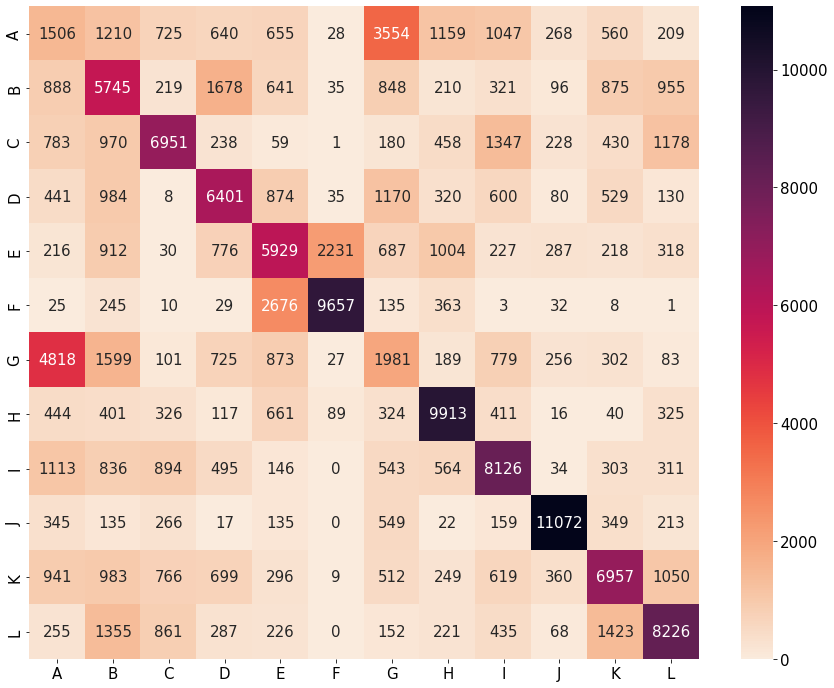

In [22]:
# copy in the confusion matrix from the HPC .o output file
ConfusionMatrix = ConfusionMatrix
df_cm = pd.DataFrame(ConfusionMatrix, index = [i for i in "ABCDEFGHIJKL"],
                  columns = [i for i in "ABCDEFGHIJKL"])
plt.figure(figsize = (15,12))
cmap = sn.cm.rocket_r
ax = sn.heatmap(df_cm, annot=True, annot_kws={"fontsize":15}, fmt='g', cmap = cmap)
ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = 15)
ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize = 15)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=15)

# **French Polynesia habitat classifier**

In [26]:
directory = '/content/drive/MyDrive/Reef soundscapes with AI/Results/CNN_predictions_poly_habitat/'
num_classes = 2


def change_to_letter(df):
  """ to convert class predictions from numbers to letters so
  Confusion matrix can show letters - as these correspond to site name"""
  df.loc[df['Prediction'] == 1, 'Prediction'] = 'A'
  df.loc[df['Prediction'] == 2, 'Prediction'] = 'B'

  return df

def get_repeat_num(filename):
  """get the repeat number from the filename. Got this off
  stackoverflow, no idead why it works but it does"""
  no_digits = string.printable[10:]
  trans = str.maketrans(no_digits, " "*len(no_digits))
  return filename.translate(trans).split()[0]


# This function reads in results df from the NN and finds the class for each 0.96s chunk
def find_prediction (df, class1, class2,Prediction):
    class_prediction_string = batch_32[['Class1','Class2']].idxmax(axis=1)
    class_prediction_string_aslist = class_prediction_string.tolist()
    class_prediction_ints = []
    for item in class_prediction_string:
      class_ = int(item[5:])
      class_prediction_ints.append(int(class_))

    batch_32['Prediction'] = class_prediction_ints
    
    #df[Prediction] = class_prediction_ints  # WARNING!!! for >2 classes, may need changing
    df['True class'] = pd.to_numeric(df['True class']+1) #add 1 so classes go 1,2 etc not 0,1 etc, switch to numeric
    return df


def similar(x,y):
    si = 0
    for a,b in zip(x, y):
        if a == b:
            si += 1
    return (si/len(x)) * 100

all_acc_scores = []
whole_day_acc_scores = []


ConfusionMatrix = np.zeros((num_classes,num_classes), dtype=float)
for i in range(1,101):
  repeat_all_acc_scores = []
  repeat_whole_day_acc_scores = []
  repeat = str(i)
  for file in os.listdir(directory):
  #for file in repeat:
      filename = os.fsdecode(file)   
      if filename.endswith(".csv"):
        repeat_num = get_repeat_num(filename)
        if repeat_num==repeat:
          print(filename)
          #Read csv file, add headers for class
          batch_32 = pd.read_csv(directory + filename, names=['Class1','Class2', "True class"])
          
          results = find_prediction(batch_32, 'Class1','Class2', 'Prediction')

          #Finds the mode prediction for each minute from all 62 0.96 chunks:
          predictions_byminute = results.groupby(results.index // 62).agg(lambda x: x.value_counts().index[0])

          #Calculate accuracy and store this
          df = pd.concat([predictions_byminute['True class'], predictions_byminute['Prediction']], axis = 1)
          accuracy = (predictions_byminute['True class'][0:len(predictions_byminute['True class'])] == predictions_byminute['Prediction'][0:len(predictions_byminute['Prediction'])]).sum() / len(predictions_byminute['True class'])
          print('Accuracy using most common prediction per one-minute: ' + str(accuracy))
          all_acc_scores.append(accuracy)
          repeat_all_acc_scores.append(accuracy)
          
          # Get 24hr acc
          #change_to_letter(df) ###
          new_conf = confusion_matrix(df['True class'], df['Prediction'])
          ConfusionMatrix = np.add(ConfusionMatrix, new_conf)

          # see if for this site the 1min files are predicted right >50% of the time
          if  accuracy >= 0.5:
            whole_day_acc = 1
          else:
            whole_day_acc = 0


          print('Accuracy using most common prediction per 24hr: ' + str(whole_day_acc))
          whole_day_acc_scores.append(whole_day_acc)
          repeat_whole_day_acc_scores.append(whole_day_acc)
#print()
#1min avg accs
#mean1 = Average(repeat_all_acc_scores)
#stdev1 = statistics.stdev(repeat_all_acc_scores) # comment out if only testing on one csv
#print()
#print('This repeats 1min accuracy:')
#print('Mean: ' + str(round(mean1, 5)) + ' & StDev: ' + str(round(stdev1, 5)))

#24hr avg accs
#mean2 = Average(repeat_whole_day_acc_scores)
#stdev2 = statistics.stdev(repeat_whole_day_acc_scores) # comment out if only testing on one csv
#print()
#print('This repeats 24hr accuracy:')
#print('Mean: ' + str(round(mean2, 5)) + ' & StDev: ' + str(round(stdev2, 5)))
#print()





#1min avg accs
mean = Average(all_acc_scores)
stdev = statistics.stdev(all_acc_scores) # comment out if only testing on one csv
print()
print(all_acc_scores)
print()
print('1min accuracy:')
print('Mean: ' + str(round(mean, 5)) + ' & StDev: ' + str(round(stdev, 5)))

#24hr avg accs
mean = Average(whole_day_acc_scores)
stdev = statistics.stdev(whole_day_acc_scores) # comment out if only testing on one csv
print()
print(whole_day_acc_scores)
print('24hr accuracy:')
print('Mean: ' + str(round(mean, 5)) + ' & StDev: ' + str(round(stdev, 5)))

print()
print('Confusion Matrix across all 100 repeats')
print(repr(ConfusionMatrix))

HabitatLvL_CVRepeat1_Epoch13_ValAcc_1.0_TestAcc_1.0.csv
Accuracy using most common prediction per one-minute: 1.0
Accuracy using most common prediction per 24hr: 1
HabitatLvL_CVRepeat2_Epoch1_ValAcc_0.88_TestAcc_0.89.csv
Accuracy using most common prediction per one-minute: 0.9231473010064044
Accuracy using most common prediction per 24hr: 1
HabitatLvL_CVRepeat3_Epoch10_ValAcc_1.0_TestAcc_1.0.csv
Accuracy using most common prediction per one-minute: 1.0
Accuracy using most common prediction per 24hr: 1
HabitatLvL_CVRepeat4_Epoch1_ValAcc_0.49_TestAcc_0.48.csv
Accuracy using most common prediction per one-minute: 0.484903934126258
Accuracy using most common prediction per 24hr: 0
HabitatLvL_CVRepeat5_Epoch7_ValAcc_1.0_TestAcc_1.0.csv
Accuracy using most common prediction per one-minute: 1.0
Accuracy using most common prediction per 24hr: 1
HabitatLvL_CVRepeat6_Epoch13_ValAcc_1.0_TestAcc_1.0.csv
Accuracy using most common prediction per one-minute: 1.0
Accuracy using most common predictio

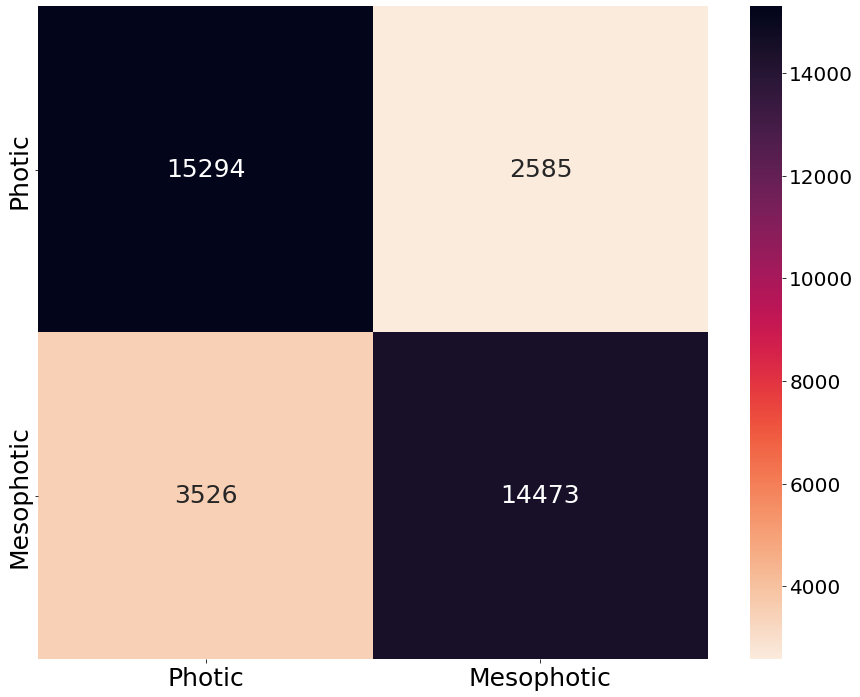

In [28]:
# copy in the confusion matrix from the HPC .o output file
#ConfuseionMatrix = confusion_matrix(test_labels, test_predictions)
array = [[15294.,  2585.],
       [ 3526., 14473.]]
df_cm = pd.DataFrame(array, index = ["Photic", "Mesophotic"],
                  columns = ["Photic", "Mesophotic"])
plt.figure(figsize = (15,12))
cmap = sn.cm.rocket_r
ax = sn.heatmap(df_cm, annot=True, annot_kws={"fontsize":25}, fmt='g', cmap = cmap)
ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = 25)
ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize = 25)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=20)

# **French Polynesia site classifier**

In [29]:
directory = '/content/drive/MyDrive/Reef soundscapes with AI/Results/CNN_predictions_poly_site/'#dont forget to end this with '/'
num_classes = 8
num_files = 100 # how many csv files

def change_to_letter(df):
  """ to convert class predictions from numbers to letters so
  Confusion matrix can show letters - as these correspond to site name"""
  df.loc[df['Prediction'] == 1, 'Prediction'] = 'A'
  df.loc[df['Prediction'] == 2, 'Prediction'] = 'B'
  df.loc[df['Prediction'] == 3, 'Prediction'] = 'C'
  df.loc[df['Prediction'] == 4, 'Prediction'] = 'D'
  df.loc[df['Prediction'] == 5, 'Prediction'] = 'W'
  df.loc[df['Prediction'] == 6, 'Prediction'] = 'X'
  df.loc[df['Prediction'] == 7, 'Prediction'] = 'Y'
  df.loc[df['Prediction'] == 8, 'Prediction'] = 'Z'

  df.loc[df['True class'] == 1, 'True class'] = 'A'
  df.loc[df['True class'] == 2, 'True class'] = 'B'
  df.loc[df['True class'] == 3, 'True class'] = 'C'
  df.loc[df['True class'] == 4, 'True class'] = 'D'
  df.loc[df['True class'] == 5, 'True class'] = 'W'
  df.loc[df['True class'] == 6, 'True class'] = 'X'
  df.loc[df['True class'] == 7, 'True class'] = 'Y'
  df.loc[df['True class'] == 8, 'True class'] = 'Z'
  return df

def get_repeat_num(filename):
  """get the repeat number from the filename. Got this off
  stackoverflow, no idead why it works but it does"""
  no_digits = string.printable[10:]
  trans = str.maketrans(no_digits, " "*len(no_digits))
  return filename.translate(trans).split()[0]


# This function reads in results df from the NN and finds the class for each 0.96s chunk
def find_prediction (df, class1, class2, class3, class4, class5, class6, class7,
                     class8, Prediction):
    class_prediction_string = batch_32[['Class1','Class2','Class3','Class4','Class5',
                                        'Class6','Class7','Class8']].idxmax(axis=1)
    class_prediction_string_aslist = class_prediction_string.tolist()
    class_prediction_ints = []
    for item in class_prediction_string:
      class_ = int(item[5:])
      class_prediction_ints.append(int(class_))

    batch_32['Prediction'] = class_prediction_ints
    
    #df[Prediction] = class_prediction_ints  # WARNING!!! for >2 classes, may need changing
    df['True class'] = pd.to_numeric(df['True class']+1) #add 1 so classes go 1,2 etc not 0,1 etc, switch to numeric
    return df

# Used to find averages of accuracy score across all minibatches
def Average(lst):
    return sum(lst) / len(lst)

all_acc_scores = []
whole_day_acc_scores = []


ConfusionMatrix = np.zeros((num_classes,num_classes), dtype=float)
for i in range(1,num_files+1):
  repeat_all_acc_scores = []
  repeat_whole_day_acc_scores = []
  repeat = str(i)
  for file in os.listdir(directory):
  #for file in repeat:
      filename = os.fsdecode(file)
      repeat_num = get_repeat_num(filename)
      if filename.endswith(".csv") and repeat_num==repeat:
      #Read csv file, add headers for class
        print(filename)
        batch_32 = pd.read_csv(directory + filename, names=['Class1','Class2','Class3','Class4','Class5',
                                        'Class6','Class7','Class8', "True class"])
        
        results = find_prediction(batch_32, 'Class1','Class2','Class3','Class4','Class5',
                                        'Class6','Class7','Class8', 'Prediction')

        #Finds the mode prediction for each minute from all 62 0.96 chunks:
        predictions_byminute = results.groupby(results.index // 62).agg(lambda x: x.value_counts().index[0])

        #Calculate accuracy and store this
        df = pd.concat([predictions_byminute['True class'], predictions_byminute['Prediction']], axis = 1)
        accuracy = (predictions_byminute['True class'][0:len(predictions_byminute['True class'])] == predictions_byminute['Prediction'][0:len(predictions_byminute['Prediction'])]).sum() / len(predictions_byminute['True class'])
        #print('Accuracy using most common prediction per one-minute: ' + str(accuracy))
        all_acc_scores.append(accuracy)
        repeat_all_acc_scores.append(accuracy)
        
        # Get 24hr acc
        change_to_letter(df) ###
        new_conf = confusion_matrix(df['True class'], df['Prediction'])
        ConfusionMatrix = np.add(ConfusionMatrix, new_conf)
        acc = 0 
        for i in range(num_classes):
          max = np.amax(new_conf[i])
          #print(max)
          if max == new_conf[i,i]:
            acc += 1
        whole_day_acc = acc/num_classes
        print('Whole day acc: ' + str(whole_day_acc))
        print('1min acc: ' + str(accuracy))
        #print('Accuracy using most common prediction per 24hr: ' + str(whole_day_acc))
        whole_day_acc_scores.append(whole_day_acc)
        repeat_whole_day_acc_scores.append(whole_day_acc)
 # print()
  #1min avg accs
  #mean1 = Average(repeat_all_acc_scores)
  #stdev1 = statistics.stdev(repeat_all_acc_scores) # comment out if only testing on one csv
  #print()
  #print('This repeats 1min accuracy:')
  #print('Mean: ' + str(round(mean1, 5)) + ' & StDev: ' + str(round(stdev1, 5)))

  #24hr avg accs
  #mean2 = Average(repeat_whole_day_acc_scores)
  #stdev2 = statistics.stdev(repeat_whole_day_acc_scores) # comment out if only testing on one csv
  #print()
  #print('This repeats 24hr accuracy:')
  #print('Mean: ' + str(round(mean2, 5)) + ' & StDev: ' + str(round(stdev2, 5)))
  #print()





#1min avg accs
mean = Average(all_acc_scores)
stdev = statistics.stdev(all_acc_scores) # comment out if only testing on one csv
print()
print(all_acc_scores)
print()
print('1min accuracy:')
print('Mean: ' + str(round(mean, 5)) + ' & StDev: ' + str(round(stdev, 5)))

#24hr avg accs
mean = Average(whole_day_acc_scores)
stdev = statistics.stdev(whole_day_acc_scores) # comment out if only testing on one csv
print()
print(whole_day_acc_scores)
print('24hr accuracy:')
print('Mean: ' + str(round(mean, 5)) + ' & StDev: ' + str(round(stdev, 5)))

print()
print('Confusion Matrix across all 100 repeats')
print(repr(ConfusionMatrix))

SiteLvL_CVRepeat1_Epoch10_ValAcc_0.99762.csv
Whole day acc: 1.0
1min acc: 1.0
SiteLvL_CVRepeat2_Epoch6_ValAcc_0.99252.csv
Whole day acc: 1.0
1min acc: 0.9986282578875172
SiteLvL_CVRepeat3_Epoch17_ValAcc_0.99538.csv
Whole day acc: 1.0
1min acc: 0.9986922406277245
SiteLvL_CVRepeat4_Epoch43_ValAcc_0.99792.csv
Whole day acc: 1.0
1min acc: 0.9995419147961521
SiteLvL_CVRepeat5_Epoch33_ValAcc_0.99671.csv
Whole day acc: 1.0
1min acc: 0.9986933797909407
SiteLvL_CVRepeat6_Epoch17_ValAcc_0.9972.csv
Whole day acc: 1.0
1min acc: 1.0
SiteLvL_CVRepeat7_Epoch10_ValAcc_0.99719.csv
Whole day acc: 1.0
1min acc: 1.0
SiteLvL_CVRepeat8_Epoch12_ValAcc_0.99458.csv
Whole day acc: 1.0
1min acc: 0.9995644599303136
SiteLvL_CVRepeat9_Epoch38_ValAcc_0.99206.csv
Whole day acc: 1.0
1min acc: 0.9986282578875172
SiteLvL_CVRepeat10_Epoch14_ValAcc_0.99382.csv
Whole day acc: 1.0
1min acc: 0.9986282578875172
SiteLvL_CVRepeat11_Epoch8_ValAcc_0.99521.csv
Whole day acc: 1.0
1min acc: 0.9991289198606271
SiteLvL_CVRepeat12_Epoc

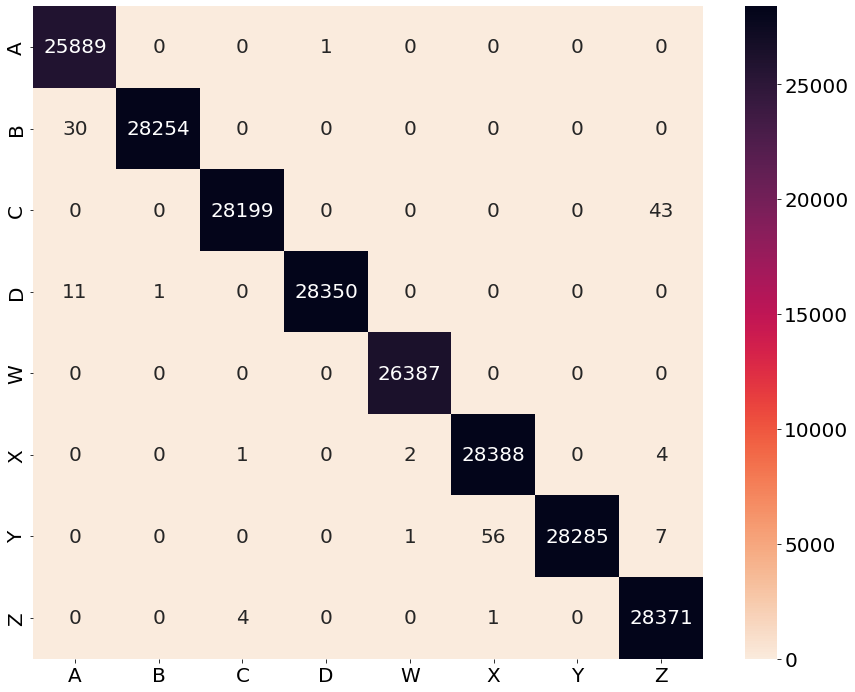

In [30]:
array = ConfusionMatrix
df_cm = pd.DataFrame(array, index = [i for i in "ABCDWXYZ"],
                  columns = [i for i in "ABCDWXYZ"])
plt.figure(figsize = (15,12))
cmap = sn.cm.rocket_r
ax = sn.heatmap(df_cm, annot=True, annot_kws={"fontsize":20}, fmt='g', cmap = cmap)
ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = 20)
ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize = 20)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=20)